# Research Question

Cereal is one of the most popular types of breakfast foods in America. Therefore, it is important that we are eating healthy cereals and that manufacturers are not putting too much sugar into our cereals. Which manufacturers are making the most sugary cereals? And do the cereals with higher sugars have a greater average rating?

My hypothesis is that the cereals with higher sugars will have, on average, higher ratings.

Dataset and documentation: https://www.kaggle.com/crawford/80-cereals?select=cereal.csv

In [22]:
#import necessary modules
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

import re

In [23]:
cereal_df = pd.read_csv("cereal.csv")

In [24]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [25]:
cereal_df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


Before we start digging deep into the data, let's look at some popular cereals.

In [26]:
cereal_df[cereal_df["name"] == "Frosted Flakes"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
25,Frosted Flakes,K,C,110,1,0,200,1.0,14.0,11,25,25,1,1.0,0.75,31.435973


In [27]:
cereal_df[cereal_df["name"] == "Froot Loops"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.0,1.0,32.207582


In [28]:
cereal_df[cereal_df["name"] == "Cheerios"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999


In [43]:
print(cereal_df.iloc[cereal_df["calories"].idxmax()])

name        Mueslix Crispy Blend
mfr                            K
type                           C
calories                     160
protein                        3
fat                            2
sodium                       150
fiber                          3
carbo                         17
sugars                        13
potass                       160
vitamins                      25
shelf                          3
weight                       1.5
cups                        0.67
rating                   30.3134
Name: 46, dtype: object


In [44]:
print(cereal_df.iloc[cereal_df["fiber"].idxmax()])

name        All-Bran with Extra Fiber
mfr                                 K
type                                C
calories                           50
protein                             4
fat                                 0
sodium                            140
fiber                              14
carbo                               8
sugars                              0
potass                            330
vitamins                           25
shelf                               3
weight                              1
cups                              0.5
rating                        93.7049
Name: 3, dtype: object


In [45]:
print(cereal_df.iloc[cereal_df["protein"].idxmax()])

name        Cheerios
mfr                G
type               C
calories         110
protein            6
fat                2
sodium           290
fiber              2
carbo             17
sugars             1
potass           105
vitamins          25
shelf              1
weight             1
cups            1.25
rating        50.765
Name: 11, dtype: object


Documentation for the outside resource I used above:
https://community.dataquest.io/t/pandas-return-row-with-the-maximum-value-of-a-column/258474/3

In [29]:
#What does the data look like stacked?
stacked = pd.DataFrame(cereal_df.stack())
stacked

0
0  name      100% Bran
   mfr               N
   type              C
   calories         70
   protein           4
...                ...
76 vitamins         25
   shelf             1
   weight            1
   cups           0.75
   rating      36.1876

[1232 rows x 1 columns]

When analyzing the manufacturers, it is important to know what their labels correspond to. These are the manufacturers:

A = American Home Food Products;

G = General Mills

K = Kelloggs

N = Nabisco

P = Post

Q = Quaker Oats

R = Ralston Purina

In [30]:
pivot = pd.pivot_table(cereal_df,
                      values="sugars",
                       index="mfr",
                      columns="name",
                      )
pivot

name,100% Bran,100% Natural Bran,All-Bran,All-Bran with Extra Fiber,Almond Delight,Apple Cinnamon Cheerios,Apple Jacks,Basic 4,Bran Chex,Bran Flakes,Cap'n'Crunch,Cheerios,Cinnamon Toast Crunch,Clusters,Cocoa Puffs,Corn Chex,Corn Flakes,Corn Pops,Count Chocula,Cracklin' Oat Bran,Cream of Wheat (Quick),Crispix,Crispy Wheat & Raisins,Double Chex,Froot Loops,Frosted Flakes,Frosted Mini-Wheats,Fruit & Fibre Dates; Walnuts; and Oats,Fruitful Bran,Fruity Pebbles,Golden Crisp,Golden Grahams,Grape Nuts Flakes,Grape-Nuts,Great Grains Pecan,Honey Graham Ohs,Honey Nut Cheerios,Honey-comb,Just Right Crunchy Nuggets,Just Right Fruit & Nut,Kix,Life,Lucky Charms,Maypo,Muesli Raisins; Dates; & Almonds,Muesli Raisins; Peaches; & Pecans,Mueslix Crispy Blend,Multi-Grain Cheerios,Nut&Honey Crunch,Nutri-Grain Almond-Raisin,Nutri-grain Wheat,Oatmeal Raisin Crisp,Post Nat. Raisin Bran,Product 19,Puffed Rice,Puffed Wheat,Quaker Oat Squares,Quaker Oatmeal,Raisin Bran,Raisin Nut Bran,Raisin Squares,Rice Chex,Rice Krispies,Shredded Wheat,Shredded Wheat 'n'Bran,Shredded Wheat spoon size,Smacks,Special K,Strawberry Fruit Wheats,Total Corn Flakes,Total Raisin Bran,Total Whole Grain,Triples,Trix,Wheat Chex,Wheaties,Wheaties Honey Gold
mfr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,10.0,NaN,8.0,NaN,NaN,NaN,1.0,9.0,7.0,13.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3.0,NaN,12.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,14.0,3.0,3.0,12.0,NaN,3.0,8.0
K,NaN,NaN,5.0,0.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,12.0,NaN,7.0,NaN,3.0,NaN,NaN,13.0,11.0,7.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,9.0,7.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,12.0,NaN,6.0,NaN,3.0,NaN,NaN,NaN,15.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,12.0,15.0,NaN,5.0,3.0,4.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


Let's do a groupby to determine which manufacturer makes the most sugary cereal on average.

In [31]:
gb = cereal_df.groupby("mfr").agg({"sugars":"mean"})
gb

,sugars
mfr,
A,3.000000
G,7.954545
K,7.565217
N,1.833333
P,8.777778
Q,5.250000
R,6.125000


In [32]:
gb.max()

sugars    8.777778
dtype: float64

<AxesSubplot:xlabel='mfr', ylabel='sugars'>

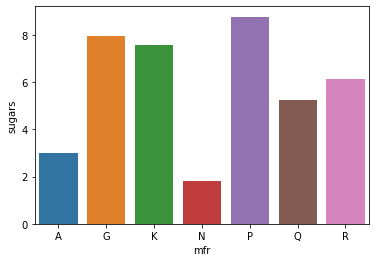

In [33]:
gb_reset_index = gb.reset_index()
sb.barplot(x="mfr",y="sugars",data=gb_reset_index)

In [34]:
# access a single row of the reshaped data

gb_reset_index.iloc[4]

mfr             P
sugars    8.77778
Name: 4, dtype: object

Therefore, it looks like the manufacturer Post has the most sugary cereal and the healthiest manugacturer is Nabisco. The most popular manufacturer Kellogs is on the higher end of the spectrum with an average of 7.56 sugars per serving. 

Now let's look at the ratings and see if sugary cereals on average get higher consumer ratings.

In [35]:
cereal_df["sugars"].mean()

6.922077922077922

In [36]:
cereal_df["rating"].mean()

42.66570498701299

<AxesSubplot:xlabel='sugars', ylabel='rating'>

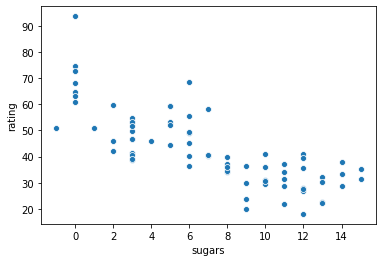

In [37]:
sb.scatterplot(x="sugars",y="rating",data=cereal_df)

Wow! That is not what I was expecting. This graph shows that, generally speaking, the more sugar in a cereal means a lower consumer rating of the cereal. This definitely went against my original hypothesis. Although, this must be taken with a grain of salt because I am not sure how vast and how reliable these consumer ratings are.

Therefore, my findings for this project is that consumers seeking a healthy option should focus on getting cereals from the manufacturer Post and staying away from the popular brand Kellogs. Additionally, if I were to make a new cereal I would focus on making a healthy cereal with little sugars because apparently consumers rate this type of cereal highly.